<a href="https://colab.research.google.com/github/vinalyan/diff/blob/master/kagle_Intermediate_Machine_Learning_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дискретная переменная 
**Categorical** **Variables**

Тут я пытаюсь разобраться с [Categorical Variables
](https://www.kaggle.com/alexisbcook/categorical-variables)

# Теория
В этом разделе, мы разберемся с понятием **дискретная (категрийная)** **переменная** и три подхода к работе с такими переменными. 


## Введение
**Дискретная переменная** может принимать ограниченное число значений.
*   Рассмотрим опрос в котором спрашивается, как часто вы едите завтра и предлают четыре варианта ответа: *"Никогда", "Редко", "Большинство дней", "Каждый день"* ("Never", "Rarely", "Most days", or "Every day"). В этом случае данные являются дискретными, так как ответы попадают в фиксированный набор категоний.
*   Если люди ответили на вопрос какая у них машина, ответы попадают в категории "Хонда", "Тайота", "Прочий хлам". Это тоже дискретные переменные. 

В большинстве моделей машинного обучения на языке Python без правильной подготовки данных с дискретными переменными может быть много дефектов. 






## Три основных подхода к работы с дискретными данными



### 1. Удаление дискретных переменных Drop Categorical Variables
Простейший вариант работы с дискретными переменными - это удаление их из набора данных. 
Данный подход хорошо работает только в случае, если колонка с дискретными переменными не несет полезной информации. 


### 2. Кодировка метки Label Encoding
**Кодировка метки** - присвоение каждому уникальному значению отдельного целого значнения.
Данный подход предполагает упорядочивание категорий.
**"Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3).**




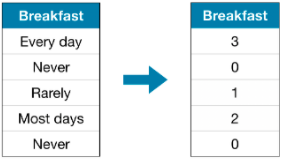

Не все дискретные переменные имеют четкий порядок следования. 
Дискретные переменные с четким порядком следования называются **порядковыми (ordinal variables)**

В моделях основанных на деревянной структуре (типа решающих деревьев) можно ожидать, что такой подход будет работать корректно.

### 3. Горячая замена (One-Hot Encoding)

При данном подходе в наборе данных создается новые колонки, отображающие все возможные варианты переменной. 


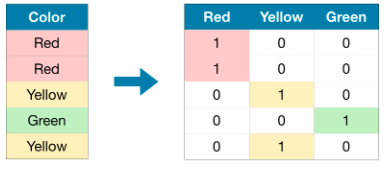

В оригинальном наборе данных, "Color" это дискретная переменная, принимающая три значения "Red", "Yellow" и "Green". 
Каждому значению сопоставлена новая колонка таблицы. 
Там, где в исходных данных было значение "Red" мы в колонке "Red" поставили 1. Так поступили и для всех остальных значений

Дискретные переменные из указанного примера не имеют четкой упорядоченности и называются **номинальными переменными**


## Примеры
Мы будем работать с  [Melbourne Housing dataset](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home).

Мы не будем фокусироваться на стадии загузки данных. Это было сделано на предыдущих уроках. 
На начало примера мы имеем обученную модель 

```X_train``` - обучающие данные 

```X_valid``` - данные для проверки

```y_train``` - обучаю

```y_valid```



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
f= open('/content/drive/My Drive/Colab Notebooks/Kaggle/melb_data.csv', 'r')  

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/melb_data.csv')
# Separate target from predictors
y = data.Price
X = data.drop(['Price'], axis=1)

# Разбиваем данные на обучающую и проверочную выбокри 
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)
# Удаляем колонки с пустыми значениями (simplest approach)
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()] 
cols_with_missing 
X_train_full.drop(cols_with_missing, axis=1, inplace=True)
X_valid_full.drop(cols_with_missing, axis=1, inplace=True)






/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
X_train_full.columns 

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [53]:
X_train_full.Type.nunique()

3

In [50]:
# "Мощьность" означает количество уникальных элементов в колонке
# Выбираем колонки с малой мощьностью <10
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]
low_cardinality_cols

['Type', 'Method', 'Regionname']

['Type', 'Method', 'Regionname']